<a href="https://colab.research.google.com/github/matheussmoreira/2023/blob/main/pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# METODOS NUMERICOS

def calc_y(h, t, y, f):
  k1 = h * f(t, y)
  k2 = h * f(t+h/2, y+k1/2)
  k3 = h * f(t+h/2, y+k2/2)
  k4 = h * f(t+h, y+k3)
  return y + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

def RungeKutta(t0, t1, h, y0, f):
  ys = [y0]
  ts = [t0]

  ti = t0
  yi = y0
  tol = 1e-5

  while (ti<t1 - tol):
    # Ajusta passo largo
    if (ti+h > t1):
      h = t1 - ti

    yi = calc_y(h, ti, yi, lambda: f)
    ti += h

    ys.append(yi)
    ts.append(ti)

  return [ts,ys]

def RungeKuttaAdapt(t0, t1, y0, f):
  tol = 1e-5
  h = 1e-7 # Passo inicial
  ti = t0
  yi = y0

  while (ti<t1):
    # Ajusta passo largo
    if (ti+h > t1):
        h = t1 - ti

    y1 = calc_y(h, ti, yi, lambda: f)
    y2 = calc_y(h/2, ti, yi, lambda: f)
    y2 = calc_y(h/2, ti, y2, lambda: f)

    delta = (y2-y1)/15
    fator = pow(tol/abs(delta), 1/5)

    if (fator >= 1.0):
      yi += y2+delta
      h = min(1.2, fator) * h
      ti += h
    else:
      h = 0.8 * fator * h

  return yi

In [6]:
import math

# CONSTANTES

g = 9.8
l = 1.0

# FUNCOES PENDULO

def mov_pendulo(theta):
  return theta + g/l * math.sin(theta)

def mov_pendulo_simp(theta):
  return theta + g/l * theta

def sol_analitica(theta_0, t):
  raiz = math.sqrt(g/l)
  return theta_0 * math.cos(raiz*t)

def periodo_simp():
  raiz = math.sqrt(l/g)
  return 2 * math.pi * raiz

def periodo(t1, t2, v1, v2):
  div = abs(v1)/(abs(v1)+abs(v2))
  diff = t2 - t1
  return 2 * (t1 + div * diff)

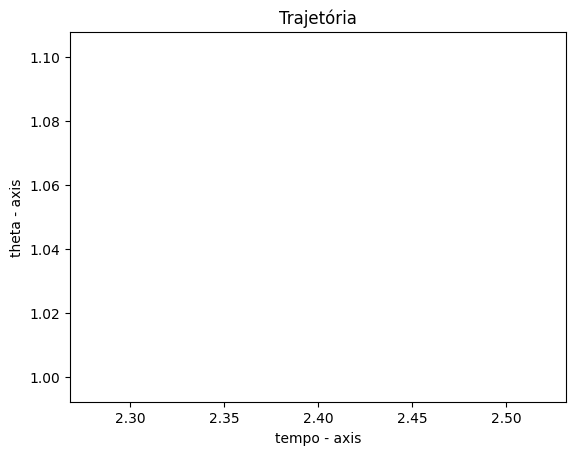

In [7]:
# MAIN

import matplotlib.pyplot as plt
import math

t0 = 2.4;
theta_01 = math.pi
y0 = sol_analitica(theta_01,t0)

h = 0.01;
t1 = 2.4;

ts, ys = RungeKutta(t0,t1,h,y0,lambda: mov_pendulo_simp)

plt.plot(ts,ys)
plt.xlabel('tempo')
plt.ylabel('angulo')
plt.title('Trajetória')
plt.show()
